#Анализ и предобработка

## Загрузка данных

Подключим необходимые библиотеки

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Так как исходные данные не имеют заголовков столбцов, добавим их явно для удобства

In [81]:
# head = ["timestamp",
# "cylinder",
# "customer",
# "job_number",
# "grain_screened",
# "ink_color",
# "proof_on_ctd_ink",
# "blade_mfg",
# "cylinder_division",
# "paper_type",
# "ink_type",
# "direct_steam",
# "solvent_type",
# "type_on_cylinder",
# "press_type",
# "press",
# "unit_number",
# "cylinder_size",
# "paper_mill_location",
# "plating_tank",
# "proof_cut",
# "viscosity",
# "caliper",
# "ink_temperature",
# "humifity",
# "roughness",
# "blade_pressure",
# "varnish_pct",
# "press_speed",
# "ink_pct",
# "solvent_pct",
# "ESA_Voltage",
# "ESA_Amperage",
# "wax",
# "hardener",
# "roller_durometer",
# "current_density",
# "anode_space_ratio",
# "chrome_content",
# "band_type"]

In [115]:
file_name = 'data.csv'

df = pd.read_csv(file_name, sep=",", encoding="utf-8", index_col=0) # если пропущенные значения отмечены специальным символом na_values="?"

In [83]:
# df.columns = head

Удалим повторяющиеся строки, если таковые имеются

In [116]:
df = df.drop_duplicates()

##Первичный анализ данных

Посмотрим на данные

In [117]:
df.head(10)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835.0,23.0,3.0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13.0,0
1,2,7574516.0,40.0,10.0,single,rented,NaN,Software_Developer,Parbhani,Maharashtra,9.0,13.0,0
2,3,3991815.0,66.0,4.0,married,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10.0,0
3,4,6256451.0,41.0,2.0,single,rented,NaN,Software_Developer,NaN,Odisha,2.0,12.0,1
4,5,5768871.0,47.0,NaN,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3.0,NaN,1
5,6,6915937.0,64.0,0.0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,NaN,12.0,0
6,7,NaN,58.0,14.0,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8.0,12.0,0
7,8,1706172.0,33.0,2.0,NaN,rented,no,Economist,Jamnagar,Gujarat,2.0,NaN,0
8,9,7566849.0,24.0,17.0,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,NaN,11.0,0
9,10,8964846.0,23.0,12.0,single,NaN,no,Architect,NaN,Telangana,5.0,13.0,0


Посмотрим информацию о датасете

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   252000 non-null  int64  
 1   income               212000 non-null  float64
 2   age                  212000 non-null  float64
 3   experience           212000 non-null  float64
 4   married              212000 non-null  object 
 5   house_ownership      212000 non-null  object 
 6   car_ownership        212000 non-null  object 
 7   profession           212000 non-null  object 
 8   city                 212000 non-null  object 
 9   state                212000 non-null  object 
 10  current_job_years    212000 non-null  float64
 11  current_house_years  212000 non-null  float64
 12  risk_flag            252000 non-null  int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 26.9+ MB


Заметим, что в датасете присутствуют пропущенные значения

Построим описательную статистику датасета для числовых признаков

In [119]:
df.describe()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.000000,2.120000e+05,212000.000000,212000.000000,212000.000000,212000.000000,252000.000000
mean,126000.500000,5.001149e+06,49.944627,10.100670,6.332241,11.997156,0.123000
std,72746.278255,2.879121e+06,17.059594,6.003362,3.644469,1.398789,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.504720e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.008596e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.479878e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Построим описательную статистику датасета для нечисловых признаков

In [120]:
df.describe(include=['object'])

,married,house_ownership,car_ownership,profession,city,state
count,212000,212000,212000,212000,212000,212000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,190414,195126,147994,5020,1062,23940


Видим, что средние по признакам значительно различаются - возможно, в дальнейшем придется нормализировать данные.

Выделим числовые и нечисловые признаки в датасете

In [121]:
numeric_columns = df.select_dtypes(include=[int, float]).columns
numeric_columns

Index(['Id', 'income', 'age', 'experience', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [122]:
non_numeric_columns = df.select_dtypes(exclude=[int, float]).columns
non_numeric_columns

Index(['married', 'house_ownership', 'car_ownership', 'profession', 'city',
       'state'],
      dtype='object')

Рассмотрим признаки как случайные величины. Начнём с числовых и выведем их гистограммы значений.

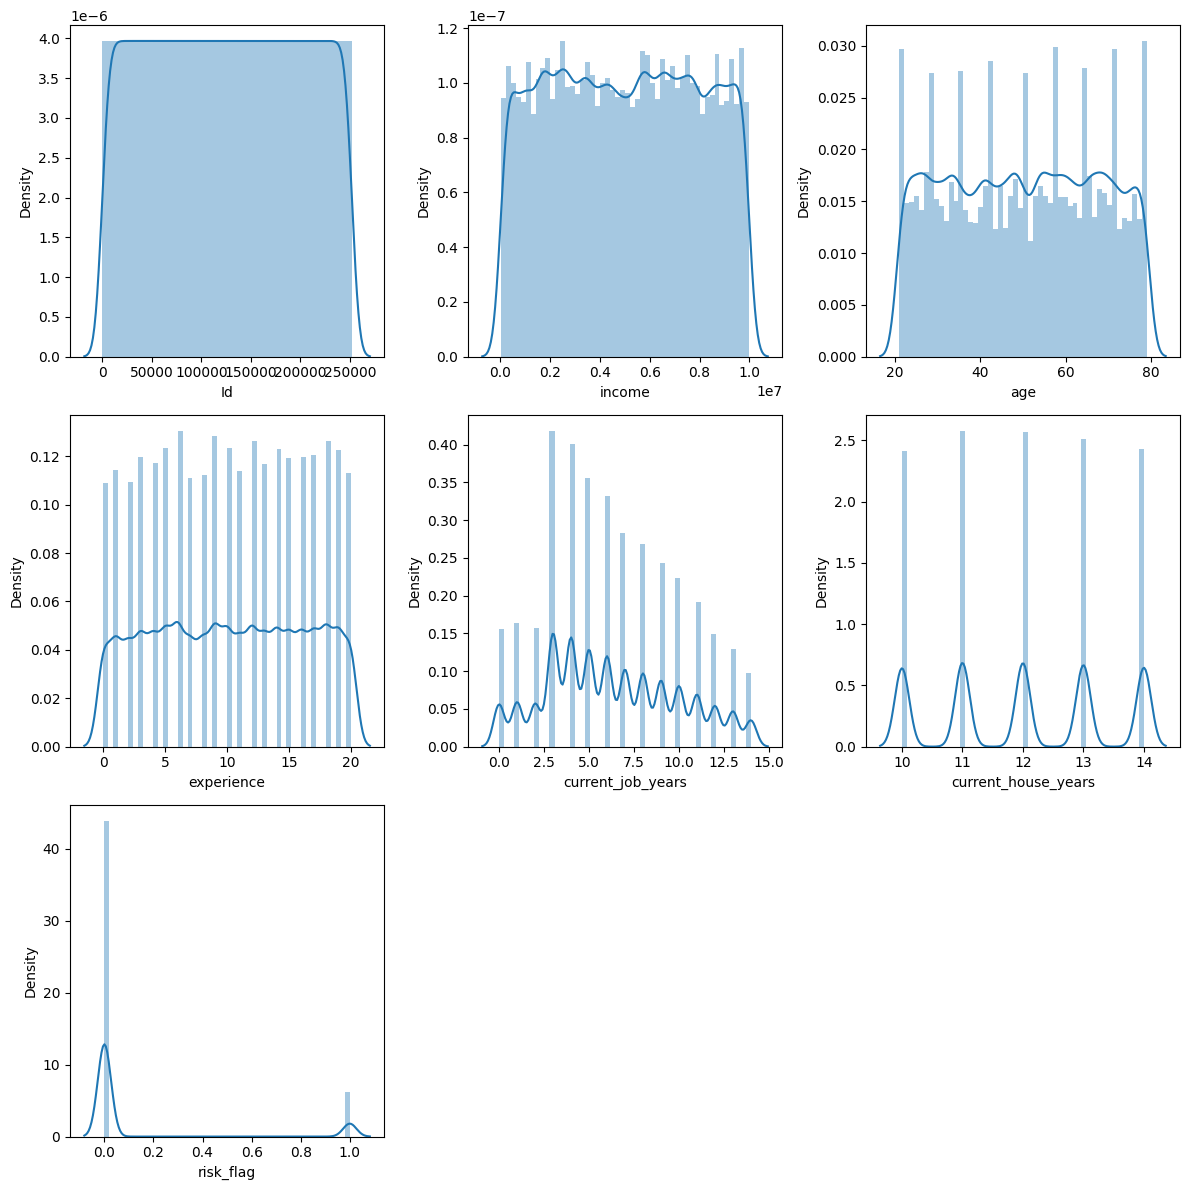

In [124]:
plt.figure(figsize=(12, 12))
for i in range(len(numeric_columns)):
    plt.subplot(3, 3, i + 1)
    sns.distplot(df[numeric_columns[i]].dropna())
    plt.tight_layout()
plt.show()

Для нечисловых признаков

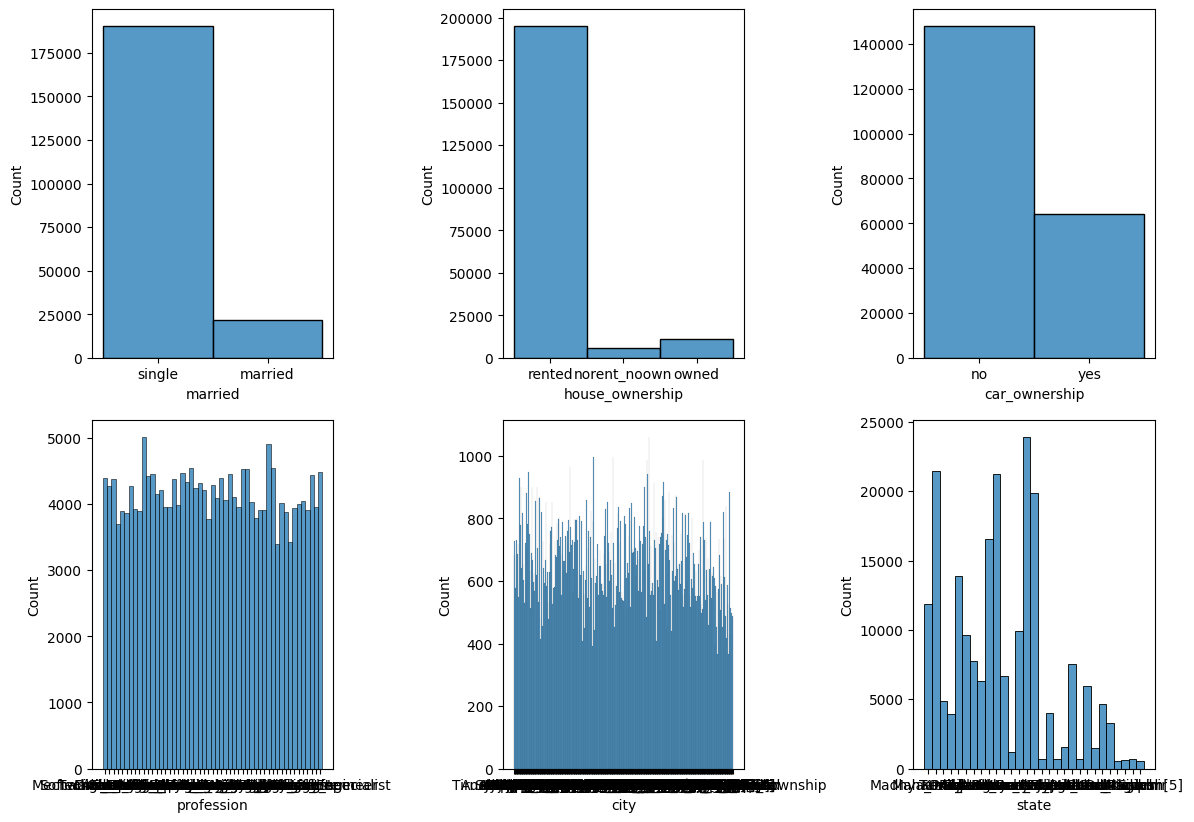

In [126]:
plt.figure(figsize=(12, 12))
for i in range(len(non_numeric_columns)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[non_numeric_columns[i]])
    plt.tight_layout()
plt.show()

Посмотрим количество пропущенных значений в каждом из столбцов

In [127]:
df.isna().sum()

Id                         0
income                 40000
age                    40000
experience             40000
married                40000
house_ownership        40000
car_ownership          40000
profession             40000
city                   40000
state                  40000
current_job_years      40000
current_house_years    40000
risk_flag                  0
dtype: int64

Попробуем удалить из датасета строки с пропущенными значениями

In [128]:
df.dropna().shape[0]

37844

Как видим, после удаления строк с пропущенными значения останется приблизительно 15% данных. Такое действие недопустимо, поэтому предобработаем их другими способами.

##Заполнение пропусков, приведение типов

Напишем метод, ищущий наиболее часто встречающееся значение в колонке. Пропускает все неопределенные (`NaN`) значения. Мы не можем сразу взять все колонки, так как в этом случае пропуск неопределенных значений будет пропускать строки, в которых есть хотя бы одно неопределенное значение.

In [159]:
def find_mode(df, columns=[], type_vals='str', verbose=False):
    modes = []
    for col in columns:
        modes.append(df[col].dropna().value_counts().idxmax())
    return modes

Напишем метод, медиану в колонке. Так же ропускает все неопределенные (NaN) значения.



In [130]:
def find_median(df, columns=[], type_vals='str', verbose=False):
    medians = []
    for col in columns:
        medians.append(np.median(df[col].dropna().astype(type_vals)))
    return medians

Напишем метод, ищущий значение по колонке. Значение может быть одним из методов.

In [131]:
def find_by_col(df, columns=[], type_vals='string', method='median', verbose=False):
    vals = []
    if verbose:
        print('Find value at columns {} with method {}'.format(columns, method))
    for col in columns:
        if method=='mean':
            if type_vals not in ['float64', 'int64']:
                type_vals = 'float64'
            find = np.mean(df[col].dropna().astype(type_vals))
            if type_vals == 'int64':
                find = int(find)
            vals.append(find)
        elif method == 'median':
            if type_vals not in ['float64', 'int64']:
                type_vals = 'float64'
            find = np.median(df[col].dropna().astype(type_vals))
            if type_vals == 'int64':
                find = int(find)
            vals.append(find)
    return vals

Напишем метод, заполняющий значения по переданному правилу method, иначе - модой.

In [156]:
def fill_na(df, columns=[], method=None, type_vals='str', verbose=False):
    if verbose:
        print('Fill values:')
    if method is None:
        method = find_mode
    fill_vals = method(df, columns=columns, type_vals=type_vals, verbose=verbose)
    for i, col in enumerate(columns):
        if verbose:
            print('fill col {} with value {}'.format(col, fill_vals[i]))
        df[col] = df[col].fillna(fill_vals[i]).astype(type_vals)
    print()
    return df

Посмотрим процент уникальных элементов по каждой колонке.

In [133]:
percent_unique = df.nunique() / len(df) * 100
print(percent_unique)

Id                     100.000000
income                  14.343254
age                      0.023413
experience               0.008333
married                  0.000794
house_ownership          0.001190
car_ownership            0.000794
profession               0.020238
city                     0.125794
state                    0.011508
current_job_years        0.005952
current_house_years      0.001984
risk_flag                0.000794
dtype: float64


Посмотрим на значения типа object - предполагаем, что они строковые.

In [134]:
df[non_numeric_columns].head(10)

,married,house_ownership,car_ownership,profession,city,state
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh
1,single,rented,NaN,Software_Developer,Parbhani,Maharashtra
2,married,rented,no,Technical_writer,Alappuzha,Kerala
3,single,rented,NaN,Software_Developer,NaN,Odisha
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu
5,single,rented,no,Civil_servant,Jalgaon,Maharashtra
6,married,rented,no,Librarian,Tiruppur,Tamil_Nadu
7,NaN,rented,no,Economist,Jamnagar,Gujarat
8,single,rented,yes,Flight_attendant,Kota[6],Rajasthan
9,single,NaN,no,Architect,NaN,Telangana


Видим, что столбец Id абсолютно уникален для каждого объекта, он неинформативен - в нем содержатся идентификаторы клиентов. Избавимся от него.

In [135]:
df.drop(['Id'], axis=1, inplace=True)

In [136]:
numeric_columns = numeric_columns.drop("Id")

Посмотрим число уникальных элементов по каждой колонке. Если значений меньше 10, напечатаем их.

In [137]:
def print_uniq_vals(df, columns=[], max_print=10, verbose=True):
    if verbose:
        print('Find unique values in columns')
    for col in columns:
        uniq = np.unique(df[col].dropna().astype('string'))
        if verbose:
            print('Column {} have {} unique values.'.format(col, len(uniq)))
        if len(uniq) <= max_print:
            print(uniq)
    print()

In [138]:
print_uniq_vals(df, columns=non_numeric_columns, verbose=True)

Find unique values in columns
Column married have 2 unique values.
['married' 'single']
Column house_ownership have 3 unique values.
['norent_noown' 'owned' 'rented']
Column car_ownership have 2 unique values.
['no' 'yes']
Column profession have 51 unique values.
Column city have 317 unique values.
Column state have 29 unique values.



Видим, что колонки married и car_ownership являются бинарными.

###Обработка числовых значений

Посмотрим на значения числовых столбцов

In [139]:
print_uniq_vals(df, columns=numeric_columns, max_print=59, verbose=True)

Find unique values in columns
Column income have 36145 unique values.
Column age have 59 unique values.
['21.0' '22.0' '23.0' '24.0' '25.0' '26.0' '27.0' '28.0' '29.0' '30.0'
 '31.0' '32.0' '33.0' '34.0' '35.0' '36.0' '37.0' '38.0' '39.0' '40.0'
 '41.0' '42.0' '43.0' '44.0' '45.0' '46.0' '47.0' '48.0' '49.0' '50.0'
 '51.0' '52.0' '53.0' '54.0' '55.0' '56.0' '57.0' '58.0' '59.0' '60.0'
 '61.0' '62.0' '63.0' '64.0' '65.0' '66.0' '67.0' '68.0' '69.0' '70.0'
 '71.0' '72.0' '73.0' '74.0' '75.0' '76.0' '77.0' '78.0' '79.0']
Column experience have 21 unique values.
['0.0' '1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '15.0' '16.0' '17.0'
 '18.0' '19.0' '2.0' '20.0' '3.0' '4.0' '5.0' '6.0' '7.0' '8.0' '9.0']
Column current_job_years have 15 unique values.
['0.0' '1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '2.0' '3.0' '4.0' '5.0'
 '6.0' '7.0' '8.0' '9.0']
Column current_house_years have 5 unique values.
['10.0' '11.0' '12.0' '13.0' '14.0']
Column risk_flag have 2 unique values.
['0' '1']



Видим, что колонка age заполнена значениями от 21 до 79. Заполним ее пропуски целочисленными значениями. Также заполним целочисленными значениями пропуски колонок experience, current_job_years, current_house_years.

Колонка risk_flag имеет всего 2 различных значения - она бинарная

Наиболее успешными практиками является заполнение пропусков в целочисленных данных медианой или средним значением. Заполним пропуски в столбцах age, experience, current_job_years, current_house_years медианой, так как медиана является более устойчивой мерой центральной тенденции, чем среднее значение, особенно к выбросам или сильным скошенностям данных. К тому же медиана сохраняет целочисленность столбцов. Напишем метод для заполнения пропущенных значений медианой:

In [140]:
int_cols=['age', 'experience', 'current_job_years', 'current_house_years']
df = fill_na(df, columns=int_cols, method=find_by_col, type_vals='int64', verbose=True)

Fill values:
Find value at columns ['age', 'experience', 'current_job_years', 'current_house_years'] with method median
fill col age with value 50
fill col experience with value 10
fill col current_job_years with value 6
fill col current_house_years with value 12



Колонка income имеет большое стандартное отклонение и имеет смысл заполнить значения средним по колонке

In [141]:
float_cols = ['income']
df_filled = fill_na(df, columns=float_cols, method=find_by_col, type_vals='float64', verbose=True)

Fill values:
Find value at columns ['income'] with method median
fill col income with value 5008596.0



Убедимся, что заполнение пропусков не изменило исходного распределения данных

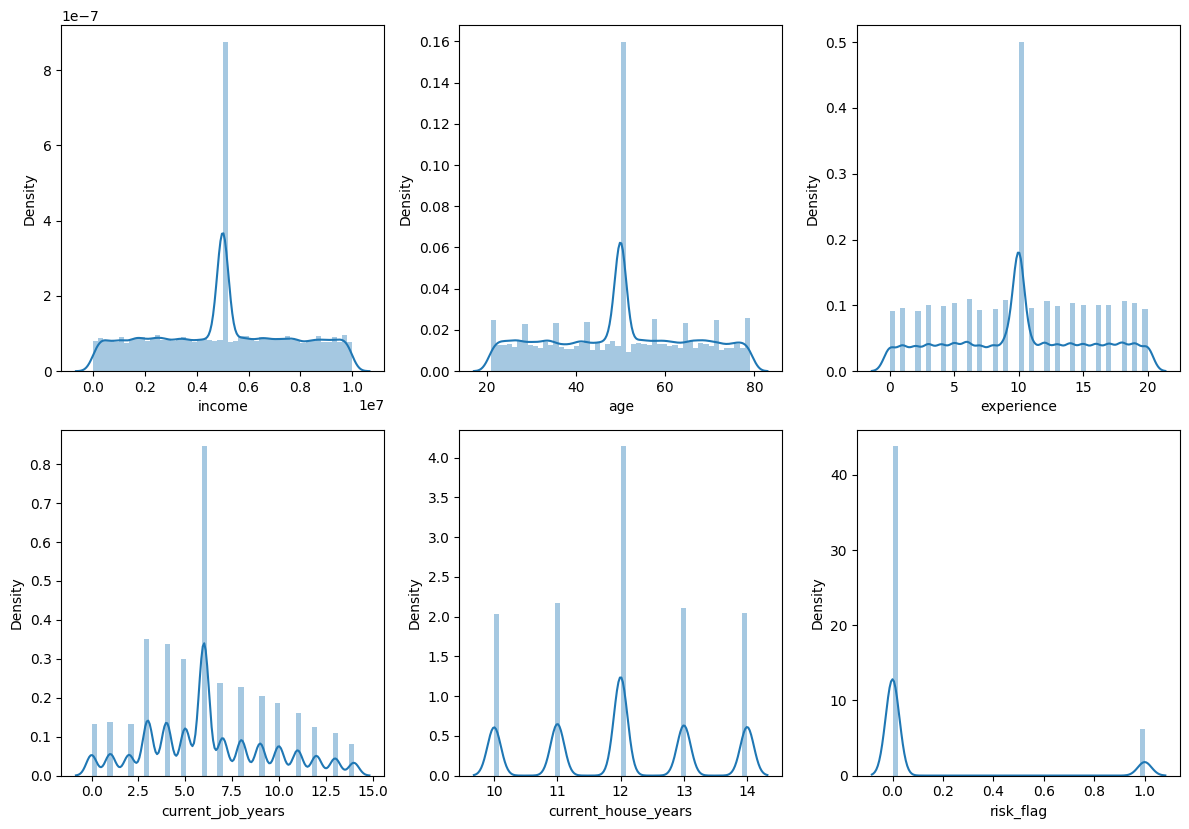

In [144]:
plt.figure(figsize=(12, 12))
for i in range(len(numeric_columns)):
    plt.subplot(3, 3, i + 1)
    sns.distplot(df[numeric_columns[i]].dropna())
    plt.tight_layout()
plt.show()

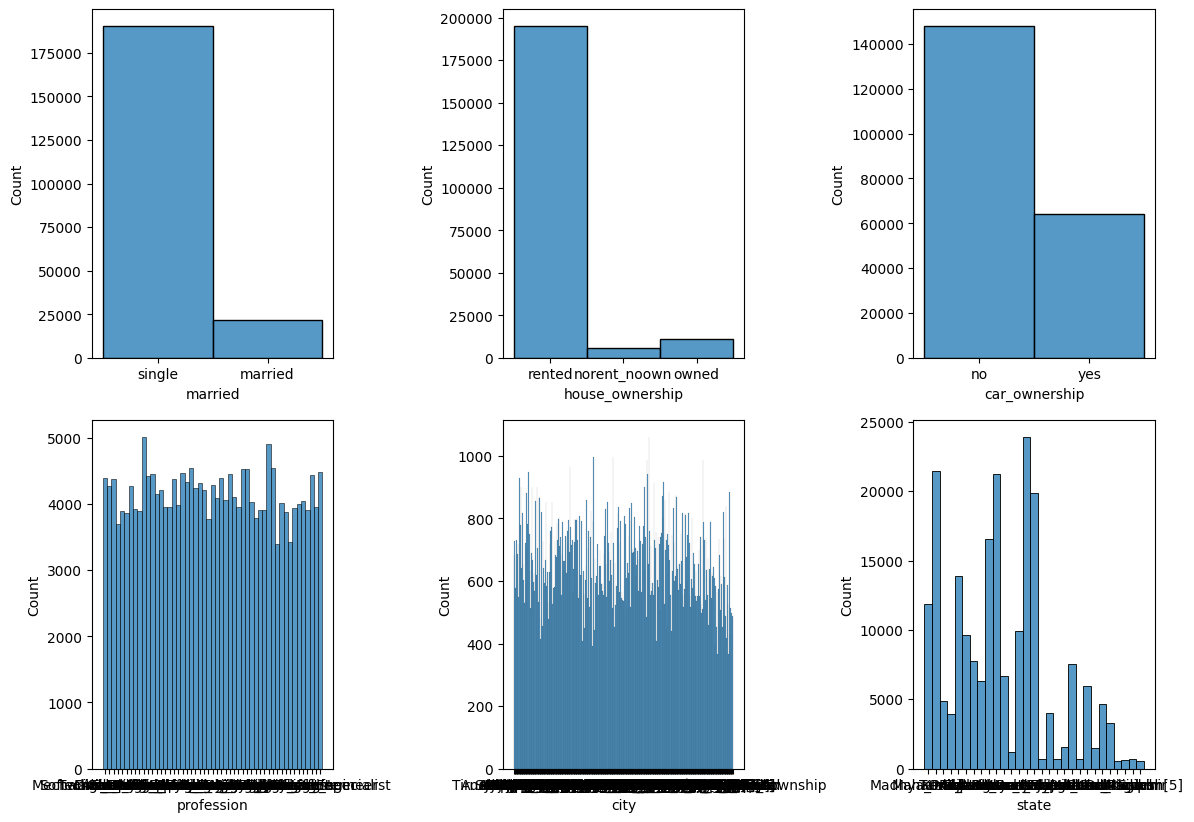

In [145]:
plt.figure(figsize=(12, 12))
for i in range(len(non_numeric_columns)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[non_numeric_columns[i]])
    plt.tight_layout()
plt.show()

Посмотрим на корелляцию числовых признаков между собой после заполнения

In [142]:
df[numeric_columns].corr()

,income,age,experience,current_job_years,current_house_years,risk_flag
income,1.000000,-0.001957,0.003521,0.006262,0.000209,-0.002937
age,-0.001957,1.000000,-0.002032,0.001358,-0.016617,-0.020968
experience,0.003521,-0.002032,1.000000,0.542194,0.013828,-0.032749
current_job_years,0.006262,0.001358,0.542194,1.000000,0.004214,-0.015364
current_house_years,0.000209,-0.016617,0.013828,0.004214,1.000000,-0.003878
risk_flag,-0.002937,-0.020968,-0.032749,-0.015364,-0.003878,1.000000


<Axes: >

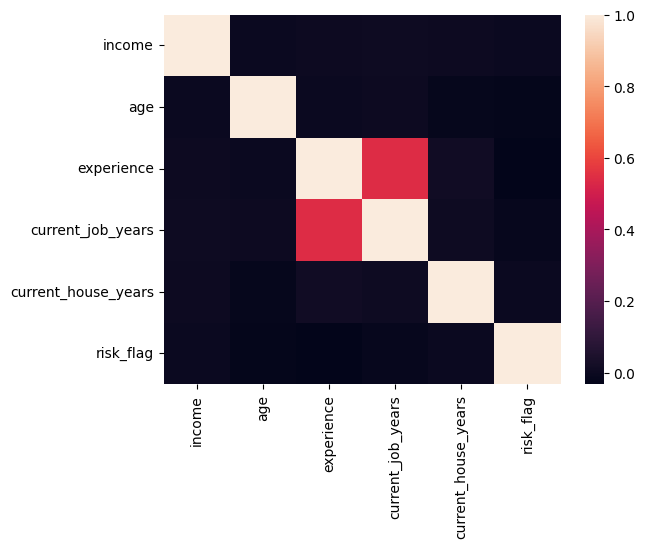

In [143]:
sns.heatmap(df[numeric_columns].corr())

Видим, что признаки слабо кореллируют между собой (кроме experience и current_job_years) - дополнительных действий не требуется. Возможно, придется избавиться от одной или нескольких из данных колонок впоследствии.

###Обработка бинарных значений

Напишем функцию, обрабатывающую бинарные значения

In [146]:
bin_cols = ['married', 'car_ownership', 'risk_flag']

In [152]:
def prepare_bin_cols(df, columns=[], type_vals='str', type_vals_end='int64', verbose=False):
    if verbose:
        print('Prepare binary columns: {}'.format(columns))
    df = fill_na(df, columns=columns, verbose=verbose)
    for col in columns:
        uniq = np.unique(df[col].dropna().astype(type_vals))
        mapping = {val:str(i) for i, val in enumerate(uniq)}
        if verbose:
            print('Change values to binary at column {} with values {}'.format(col, mapping))
        df[col] = df[col].map(mapping).astype(type_vals_end)
    if verbose:
        print()
    return df

In [160]:
df = prepare_bin_cols(df, columns=bin_cols, verbose=True)

Prepare binary columns: ['married', 'car_ownership', 'risk_flag']
Fill values:
fill col married with value single
fill col car_ownership with value no
fill col risk_flag with value 0

Change values to binary at column married with values {'married': '0', 'single': '1'}
Change values to binary at column car_ownership with values {'no': '0', 'yes': '1'}
Change values to binary at column risk_flag with values {'0': '0', '1': '1'}


ValueError: ignored